In [1]:
# Make a prediction with coefficients
import pylab
import random
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
import numpy as np
%matplotlib inline

def predict(row, coefficients):
    yhat = coefficients[0]
    for i in range(len(row)-1):
        yhat += coefficients[i + 1] * row[i] 
    return yhat

In [8]:
# Estimate linear regression coefficients using stochastic gradient descent
gobalCoef = []
def coefficients_sgd(train, l_rate, n_epoch):
    coef = [0.0 for i in range(len(train[0]))]
    #print(coef)
    errorArr = []
    epochArr = []
    for epoch in range(n_epoch):
        sum_error = 0.0
        epochArr.append(epoch)
        for row in train:
            yhat = predict(row, coef)
            error = yhat - row[-1]
            sum_error += error **2          
            coef[0] = coef[0] - l_rate * error
            for i in range(len(row)-1):
                coef[i + 1] = coef[i + 1] - l_rate * error * row[i]
                
        globalCoef = coef
        print("Updated Coefficients are " + str(globalCoef))
        errorArr.append(round(sum_error,5))
        #diff = errorArr[epoch-1] - errorArr[epoch]
        #print("Difference=" + str(diff))
        if epoch > 0 :
            diff = errorArr[epoch-1] - errorArr[epoch]
            print("Difference=" + str(diff))
            if diff < 0.0001 :
                #print(diff)
                print("Enough Epochs")
                break
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    
    print("Error = " + str(errorArr[-1]))
    pyplot.plot(epochArr,errorArr)
    pyplot.show()
    
    return coef


def coefficients_sgd_test(train, l_rate, n_epoch, coef1):
    coef = coef1
    #print(coef)
    errorArr = []
    epochArr = []
    for epoch in range(n_epoch):
        sum_error = 0.0
        epochArr.append(epoch)
        for row in train:
            yhat = predict(row, coef)
            error = yhat - row[-1]
            sum_error += error **2          
            coef[0] = coef[0] - l_rate * error
            for i in range(len(row)-1):
                coef[i + 1] = coef[i + 1] - l_rate * error * row[i]
                
        globalCoef = coef
        print("Updated Coefficients are " + str(globalCoef))
        errorArr.append(round(sum_error,5))
        #diff = errorArr[epoch-1] - errorArr[epoch]
        #print("Difference=" + str(diff))
        if epoch > 0 :
            diff = errorArr[epoch-1] - errorArr[epoch]
            print("Difference=" + str(diff))
            if diff < 0.0001 :
                #print(diff)
                print("Enough Epochs")
                break
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    
    print("Error = " + str(errorArr[-1]))
    pyplot.plot(epochArr,errorArr)
    pyplot.show()
    
    return coef

In [1]:
import csv

p=[]
dataset=[]
with open('1.txt') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            x = float(row[0])
            y = float(row[1])
            p =[x,y]
            dataset.append(p)       
        random.shuffle(dataset)
        
        trainData ,testData = train_test_split(dataset,test_size=0.3)
l_rate = 0.01
n_epoch = 100

coef = coefficients_sgd(trainData, l_rate, n_epoch)
print("Training.............Done!")

globalCoef = coef
print("Global Coef " + str(globalCoef))

testCoef = coefficients_sgd_test(testData,l_rate,n_epoch,globalCoef)
print("Testing..............Done!")

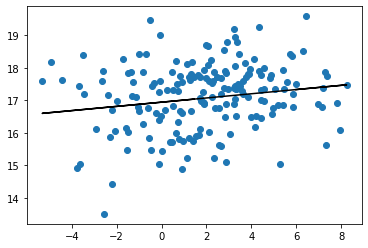

[16.940289539012884, 0.0647825441704771]


In [90]:
samples=len(trainData)
m=[]
n=[]
y_predict=[]
for i in range(samples):
    m.append(trainData[i][0])
    n.append(trainData[i][1])
    q=coef[0] + coef[1]*m[i]
    y_predict.append(q)
    

pylab.plot(m,n,'o')
pylab.plot(m,y_predict,'k-')
pylab.show()
print(coef)